### Check viewing/eye-tracking data

The purpose of this notebook is to read in the eye-tracking data and create a plot of eye gaze coordinates for different conditions - mainly to check and confirm that gaze distribution is different for different conditions (otherwise, for this project, the eye-gaze coordinates are not that relevant).

#### load relevant modules

In [1]:
import os, glob, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

import numpy as np
from scipy import interpolate


In [2]:
folders = glob.glob("../data/00_raw_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])

n_subjs = len(subjs)
print(n_subjs)

subjs[:3]

59


['sub001', 'sub002', 'sub003']

#### read all individual video data, append the x and y coordinates based on the condition 100/50nd-50wd

In [3]:
x_vals_100 = []
y_vals_100 = []

x_vals_50wd = []
y_vals_50wd = []

x_vals_50nd = []
y_vals_50nd = []

for curr_sub in range(n_subjs): 

    #print(subjs[curr_sub])
    
    file_path = '../data/01_parsed_video_data/' + subjs[curr_sub]
    files_to_load = [f for f in os.listdir(file_path)]
    #files_to_load

    for curr_file in files_to_load:
        compare  = curr_file[-8:-4]
        df = pd.read_csv(file_path + '/' + curr_file)

        if compare == '_100':
            #print(curr_file)
            x_vals_100.extend(df['point x '].values[300:500])
            y_vals_100.extend(df['point y '].values[300:500])
        elif compare == '50wd':
            x_vals_50wd.extend(df['point x '].values[300:500])
            y_vals_50wd.extend(df['point y '].values[300:500])
        elif compare == '50nd':
            x_vals_50nd.extend(df['point x '].values[300:500])
            y_vals_50nd.extend(df['point y '].values[300:500])

#### Plot

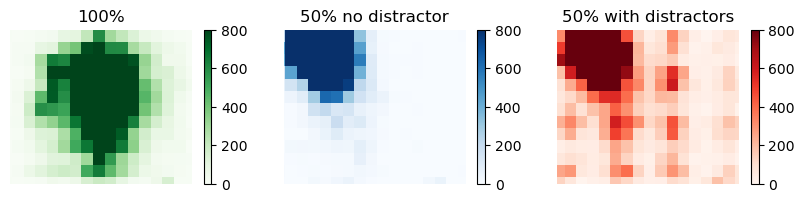

In [4]:
plt.figure(figsize = ( 10 , 2))
plt.subplot(1,3,1)
plt.hist2d(x_vals_100, y_vals_100, bins=(30, 30), cmap=plt.cm.Greens, vmin=0, vmax=800);
plt.ylim([1, 2.5])
plt.xlim([-1.2, 1.5])
plt.colorbar();
plt.axis('off')
plt.title('100%');

plt.subplot(1,3,2)
plt.hist2d(x_vals_50nd, y_vals_50nd, bins=(30, 30), cmap=plt.cm.Blues, vmin=0, vmax=800);
plt.ylim([1, 2.5])
plt.xlim([-1.2, 1.5])
plt.colorbar();
plt.axis('off')
plt.title('50% no distractor');

plt.subplot(1,3,3)
plt.hist2d(x_vals_50wd, y_vals_50wd, bins=(30, 30), cmap=plt.cm.Reds, vmin=0, vmax=800);
plt.ylim([1, 2.5])
plt.xlim([-1.2, 1.5])
plt.colorbar();
plt.axis('off')
plt.title('50% with distractors');